In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = '/content/drive/MyDrive/cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [ ]:
# 3
train_image_generator = None
validation_image_generator = None
test_image_generator = None

train_data_gen = None
val_data_gen = None
test_data_gen = None

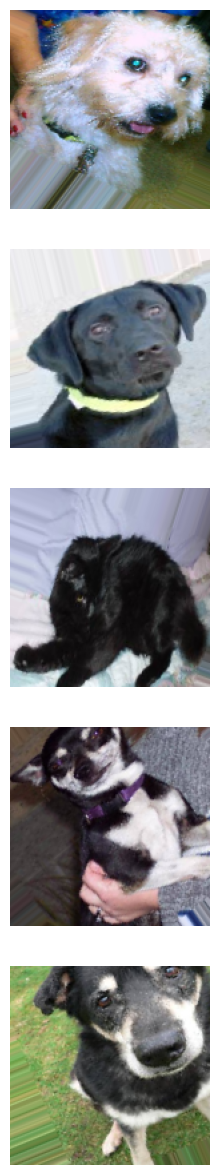

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# ipython-input-23-3291326654a4
# Import necessary libraries
import matplotlib.pyplot as plt
# Instead of importing from keras.preprocessing.image, import from tensorflow.keras.preprocessing.image:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Changed import statement to fix the error.
import os

# ... (rest of the code)

# 6
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

# Define or import the plotImages function here before calling it
def plotImages(images_arr, probabilities=False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5, len(images_arr) * 3))
    if probabilities is False:
        for img, ax in zip(images_arr, axes):
            ax.imshow(img)
            ax.axis('off')
    else:
        for img, ax in zip(images_arr, axes):
            ax.imshow(img)
            ax.axis('off')
            # Add logic here to display probabilities if necessary
            # For example:
            # ax.set_title(f"Probability: {some_probability}"

Found 2000 images belonging to 2 classes.


In [ ]:
# 7
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ... other imports ...

# ... (Your existing code for train_data_gen) ...

# Define validation_data_gen
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

validation_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir, # Assuming you have a validation_dir defined
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6395 - loss: 0.6158 - val_accuracy: 0.6719 - val_loss: 0.6078
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.6016 - loss: 0.6683 - val_accuracy: 0.6250 - val_loss: 0.6086
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6748 - loss: 0.6000 - val_accuracy: 0.6875 - val_loss: 0.5915
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6875 - loss: 0.6050 - val_accuracy: 0.6346 - val_loss: 0.6450
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 40s 962ms/step - accuracy: 0.6643 - loss: 0.5997 - val_accuracy: 0.6920 - val_loss: 0.5760
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.6875 - loss: 0.5874 - val_accuracy: 0.7019 - val_loss: 0.5347
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6812 - loss: 0.5982 - val_accuracy: 0.6719 - val_loss: 0.5977
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7266 - loss: 0.5851 - val_accuracy: 0.7308 - 

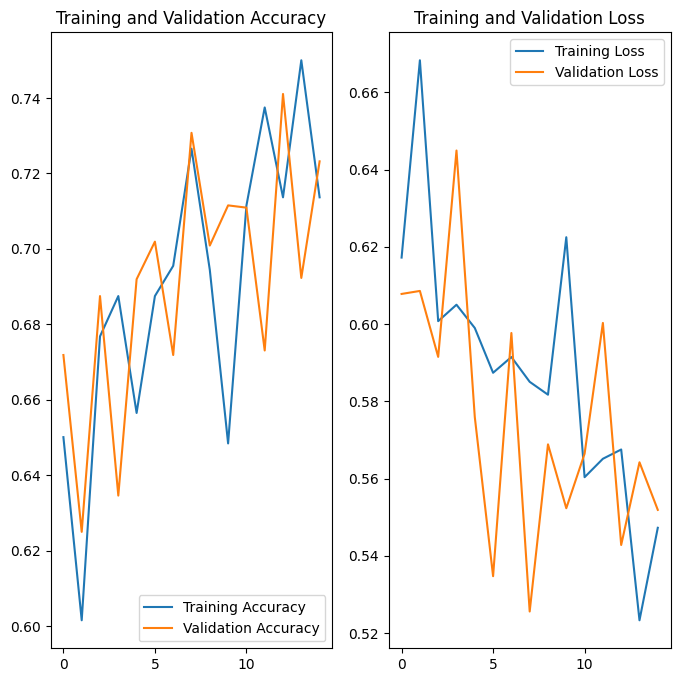

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# ... other imports ...

# ... (Your existing code for train_data_gen and validation_data_gen) ...

# Assuming you have defined your model as 'model', and your training and validation data as 'train_data_gen' and 'validation_data_gen', respectively.
# Fit the model and store the training history in the 'history' variable
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps=total_val // batch_size
)

# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#10
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping

# Define image size
IMG_SIZE = 224  # ResNet50 expects 224x224 images

# Prepare the data augmentation generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data should be rescaled only (no augmentation)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Assuming you have a directory with 'train' and 'validation' subdirectories
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/cats_and_dogs/train',  # Path to your training data
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary'  # 'binary' for binary classification (cats vs dogs)
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/cats_and_dogs/validation',  # Path to your validation data
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary'
)

# Load the pre-trained ResNet50 model without the top layer (so we can add our own)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the layers of the base model so they are not trained
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Set up early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 57s 695ms/step - accuracy: 0.5135 - loss: 0.7532 - val_accuracy: 0.5620 - val_loss: 0.6854
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 68s 523ms/step - accuracy: 0.5335 - loss: 0.7175 - val_accuracy: 0.5550 - val_loss: 0.6809
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 622ms/step - accuracy: 0.5279 - loss: 0.7069 - val_accuracy: 0.6010 - val_loss: 0.6693
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 532ms/step - accuracy: 0.5399 - loss: 0.6953 - val_accuracy: 0.5870 - val_loss: 0.6702
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 535ms/step - accuracy: 0.5368 - loss: 0.6934 - val_accuracy: 0.6040 - val_loss: 0.6627
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 525ms/step - accuracy: 0.5718 - loss: 0.6802 - val_accuracy: 0.6040 - val_loss: 0.6613
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 538ms/step - accuracy: 0.5585 - loss: 0.6788 - val_accuracy: 0.6010 - val_loss: 0.6646
Epoch 8/10
63

In [74]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 42.0% of the images of cats and dogs.
You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!
